<a href="https://colab.research.google.com/github/btshow/ARMA_Simulator/blob/main/ARMA_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation of a ARMA(p,q) time series.

This script generates a time series y that has the statistical properties of an ARMA process.

Instructions:
1. Run the code cell after "Define ARMA Function" to define the python function that will generate the ARMA time series y.
2. Run the code cell after "Generate ARMA times series y" to actually generate the ARMA time series y. (Choose the parameters of the function how you like it)

## Define ARMA Function

In [1]:
 """
FUNCTION DEFINITION
Monte Carlo Simulation of a ARMA(p,q) time series.

INPUT PARAMETERS

alpha:    This value is a constant and added each period. 
          
          Note: alpha and the AR coefficients (the elements of beta)-
          determine the mean of the resulting series y. 
          For a single AR coefficient beta<1 (and with neither a linear trend,
          nor seasonality) the mean(y)~E(y)=alpha/(1-beta)

beta:     An array of length p with the AR coefficients (the AR part of 
          the ARMA model). 
          
          Note 1: alpha and the AR coefficients (the elements of beta)-
          determine the mean of the resulting series y. 
          For a single AR coefficient beta<1 (and with neither a linear trend,
          nor seasonality) the mean(y)~E(y)=alpha/(1-beta)

          Note 2: If beta has a single element i.e. one AR coefficient 
          the coefficient should be beta<1 in order to keep the process 
          stationary. 
            With beta=1 we will have "random-walk stationarity". 
            With beta>1 the values of y will explode in size.
            With more than one AR components determining stationarity is more involved.

theta:    An array of length q with the MA coefficients (the MA part of 
          the ARMA model).

sigma:    Standard deviaton of the normally distributed errors 
          The standard deviation can be set by sigma, however the of the errors 
          is always set to 0).

linear_trend_parameter: Adds a linear trend to the generation of the y series. 
                        The value of this parameter is added each period.

seasonality4_parameters:  Adds a 4 period seasonality pattern to the generation 
                          of the y series. 
                          The 1st element of seasonality4_parameters is added 
                          when generating y1.
                          The 2st element of seasonality4_parameters is added 
                          when generating y2.
                          etc up to 4th element and y4. 
                          For y5 the 1st element of seasonality4_parameters 
                          is added. 
                          For y6 the 2st element of seasonality4_parameters 
                          is added. etc
seasonality12_parameters:  Adds a 12 period seasonality pattern to the generation 
                           of the y series. For the mechanism see 
                           seasonality4_parameters.

n:        Length of the returned time-series.

initial_y_value: if this parameter is set to a value unequal to 0, 
                 then y0 is set by this value and is used as y_t-1=y0 when
                generating y1.
                if this parameter is not set or equal to zero. y0 is drawn from 
                the normal distribution which is determined by sigma. 

warm_start:   I you want a quite representative ARMA process you want to discard 
          a few observations at the beginning. The values at the beginning are 
          heavily influenced by the starting values i.e. y0 
          warm_start is the number of values discarded from the start of the series 
          before outputting the final y series.
""" 

from numpy import append,array
from numpy.random import normal
import numpy as np
import math as math

def ARMAgenerator(alpha,
                  beta,
                  theta,
                  sigma,
                  linear_trend_parameter,
                  seasonality4_parameters,
                  seasonality12_parameters,
                  n,
                  initial_y_value,
                  warm_start,
                  verbose=0):
    l=max(len(beta),len(theta))
    if(warm_start!=0):
      warm_start=10*l # Burn-in elements!
    error=normal(0,sigma,n+warm_start)
    #print(error)
    y=array([])
    s=0.0
    trend=0
    season=0
    l=max(len(beta),len(theta))
    def season_index(trend,number_of_seasons):
      for i in range(number_of_seasons):
        if round(math.modf(trend/number_of_seasons)[0],4)==round(math.modf((i+1)/number_of_seasons)[0],4):
          season = int(i)
          return season

    for i in range(n+warm_start):
        if(i<l):
          if (initial_y_value!=0):
            y=append(y,initial_y_value)
            #print(f'Initial y value i.e. y0 is: {initial_y_value}') 
          else:
            y=append(y,error[i])
            #print(f'Initial error value i.e. at time t={i} is: {error[i]}') 

        else:
          trend+=1
          season4 = season_index(trend,4)
          season12 = season_index(trend,12)
            
          s=0.0 #sum for each n to carry the intermediate results of the AR and MA components forwards through the loops
          for j in range(len(beta)):
              s=s+beta[j]*y[i-j-1]
          for j in range(len(theta)):
              s=s+theta[j]*error[i-j-1]
              #print(error[i-j-1])
          y_t = s + error[i] + alpha + linear_trend_parameter*trend + seasonality4_parameters[season4]+ seasonality12_parameters[season12]
          y=append(y,y_t) #
          #print(f'error at time t={i} is: {error[i]}')
          #print(f'error at time t={i} is: {error[i]}')
    if(verbose!=0):
      print (f'Measured error standard deviation: {(np.sqrt(np.var(error[warm_start:])))}, Measured series mean: {np.mean(y)}')
    return y[warm_start:]


## Generate ARMA times series y

Generate ARMA(𝑝,𝑞) time series with normally distributed errors, optionally with: linear time trend, 4-period seasonality, 12-period seasonality.

Feel free to play around with the parameters. Please be aware that certain parameter settings might result in strang e.g. exploding processes. Please see the parameter descriptions in the code cell above for more detail.

Measured error standard deviation: 1.0340286125267202, Measured series mean: 28.493120179843565


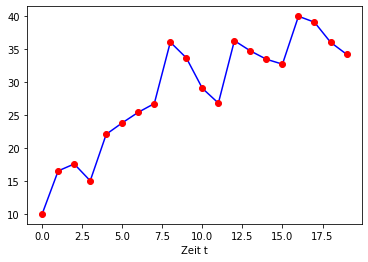

In [2]:
# Set Parameters
alpha = 10.0 # Constant
beta=[0.5]  #AR Components, for more than one AR component specify a list e.g. [0.4,0.3]
theta= [0.9] # MA Components, for more than one MA component specify a list e.g. [0.1,-0.3]
sigma=1.0 # Standard deviation of the normal distribution from which the errors are pulled each period

#seasonality4_parameters = [0.0,0.0,0.0,0.0] 
seasonality4_parameters = [0.5,-2.0,-3.0,6.0] # Seasonality that stretches over 4 periods. 
#The specified numbers are added to the constant in the respective periods.
assert len(seasonality4_parameters)==4, 'seasonality4_parameters must have 4 float elements'

seasonality12_parameters = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
#seasonality12_parameters = [3.0,2.0,1.0,0.0,-1.0,-2.0,-3.0,-2.0,-1.0,0.0,1.0,2.0] # Seasonality that stretches over 12 periods. 
#The specified numbers are added to the constant in the respective periods.
assert len(seasonality12_parameters)==12, 'seasonality12_parameters must have 12 float elements.'

n=20  # number of generated observations
warm_start=0  #number of periods that are ignored at the start of the generated time series 
#useful if avoiding dependency from starting values is needed. In case set a high value e.g. warm_start=100 
initial_y_value=10.0 # starting value of y in period zero.
linear_trend_parameter=0.5 # linear additive trend: this value is cumulatively added to the constant with increasing time


y=ARMAgenerator(alpha,
                  beta,
                  theta,
                  sigma,
                  linear_trend_parameter,
                  seasonality4_parameters,
                  seasonality12_parameters,
                  n,
                  initial_y_value,
                  warm_start,
                  verbose=1)

#Plot resulting time series y_t
x_limits = [None,None]#[xmin,xmax]
y_limits = [None,None]#[-5,15]#[ymin,ymax]
import matplotlib.pyplot as plt
plt.xlabel("Zeit t")
#plt.ylabel("ARMA(0,0) Series")
plt.plot(y,'-b') # This plots the series as a red line.
plt.plot(y,'or') # This plots the series as red points.
axes = plt.gca()
axes.set_xlim(x_limits)
axes.set_ylim(y_limits)
#plt.hlines(alpha, 0, n, colors='k', linestyles='dashed', label='\alpha')
plt.show()